In [31]:
# !pip install plotly
# !pip install ipywidgets
import io
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import plotly.graph_objects as go
import requests

from collections import Counter 
# from environment.settings import config
from matplotlib import colors 
from PIL import Image
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans 
from typing import Tuple

import pickle
import ast

import sys
sys.path.append("/home/stratos/Documents/datathlon-GPT-main")

# dataset_dir = config['DATASET_DIR']
dataset_dir='../data/'


# Number of colors to be extracted
NUM_COLORS = 10

Convenience functions

In [32]:
def rgb2hex(rgb: np.ndarray):
    ''' Converts an N X 3 numpy array of RGB values into a list of hex strings'''
    hex_list = list(map(lambda x: '#%02x%02x%02x' % tuple(x), rgb))
    return hex_list

def url2img(url: str):
    ''' Gets a URL and returns a PIL image '''
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return img

def url2array(url: str):
    ''' Gets a URL and returns an image as a numpy array '''
    response = requests.get(url)
    img = Image.open(io.BytesIO(response.content))
    return np.array(img)

def extract_colors(model: KMeans, img: np.ndarray) -> Tuple[np.ndarray, Counter, np.ndarray]:
    ''' Extract the X most common colors from an image with a KMeans model '''
    if len(img.shape)==3:
        img2d = img.reshape((img.shape[0]*img.shape[1],3))
    else:
        img2d = np.stack((img,img,img),axis=2).reshape(img.shape[0]*img.shape[1],3)
    cluster_labels = model.fit_predict(img2d)
    return cluster_labels, Counter(cluster_labels), model.cluster_centers_.astype(int)

Read the data


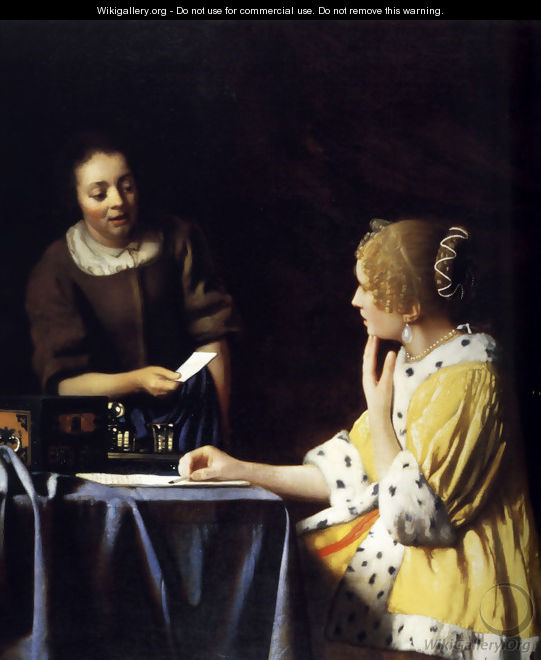

In [21]:
import plotly.express as px
a=2000

Artwork = pd.read_csv(dataset_dir+'Artwork.csv')
url =Artwork[Artwork.id==a].image_url.values[0]
img = url2array(url)
# img2 = np.stack((img,img,img),axis=2).reshape(img.shape[0]*img.shape[1],3)
fig = px.imshow(img)
fig.show()

In [33]:
with open('pickle_portraits', 'rb') as handle:
    results = pickle.load(handle)

rgb_colors = results[0]['rgb_colors']
cluster_counts = results[0]['cluster_counts']
img_quant = results[0]['rgb_colors']

FileNotFoundError: [Errno 2] No such file or directory: 'pickle_portraits'

In [24]:
df['name']

0             Post-Impressionism
1                  Impressionism
2                      Academism
3                    Orientalism
4               Dutch Golden Age
5                        Baroque
6                      Symbolism
7                    Art Nouveau
8               Vienna Secession
9                    Romanticism
10                   Renaissance
11                       Realism
12                   Primitivism
13                    Synthetism
14           Hudson River School
15                 Expressionism
16                        Gothic
17                      Luminism
18         Rocky Mountain School
19                      Tonalism
20    Pre-Raphaelite Brotherhood
21                 Ashcan School
22                   Avant-Garde
23                     Mannerism
24               Venetian School
25                   Pointillism
26                   Divisionism
27             Neo-Impressionism
28           Early Netherlandish
29                 Neoclassicism
30        

Clustering

In [29]:
df = pd.read_csv(dataset_dir+'movement_supercluster.csv')

index=df.index[df['name']=='Gothic'].to_list()[0]
# index=df.index[df.id==a].to_list()[0]

rgb_colors = ast.literal_eval(df['rgb_colors'][index])
cluster_counts = ast.literal_eval(df['cluster_counts'][index])
# df['name'][index]

In [ ]:
# !pip install opencv-python
import urllib.request
import ssl
import os
import cv2
index = 0

with open(dataset_dir+'img_pallets_faces.pkl', 'rb') as handle:
    faces_pallete = pickle.load(handle)
df = pd.DataFrame(faces_pallete)
rgb_colors = df['rgb_colors'][index]
cluster_counts = df['cluster_counts'][index]
artist_id = df['id'][index]
ArtistPicture = pd.read_csv(dataset_dir+'ArtistPicture.csv')

ssl._create_default_https_context = ssl._create_unverified_context
image_name = ArtistPicture[ArtistPicture['id']==artist_id]['url'].item().split('/')[-1]
urllib.request.urlretrieve(ArtistPicture[ArtistPicture['id']==artist_id]['url'].item(), image_name)
image_path = os.path.join('./', image_name)
img = cv2.imread(image_path)

red = img[:,:,2].copy()
blue = img[:,:,0].copy()
img[:,:,0] = red
img[:,:,2] = blue

plt.imshow(img)
plt.show()

In [30]:
fig = go.Figure()

labels = rgb2hex(rgb_colors)
values = list(map(lambda x: x[1], sorted(cluster_counts.items())))

pie = go.Pie(labels=labels, values=values, hole=.2, marker=dict(colors=labels))
fig.add_trace(pie)
fig.show()


In [6]:
fig = go.Figure()

labels = rgb2hex(rgb_colors)
values = list(map(lambda x: x[1], sorted(cluster_counts.items())))

pie = go.Pie(labels=labels, values=values, hole=.2, marker=dict(colors=labels))
fig.add_trace(pie)
fig.show()


In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=['Original (Top) & Clustered Image (Bottom)', f'{NUM_COLORS} Most Common Colors'],
                    specs=[[{'type': 'xy'}, {'type': 'domain'}]], column_widths=[0.8, 0.2])

# Extract the hex values from the RGB colors
labels = rgb2hex(rgb_colors)
# Get the number of occurences for each color
values = list(map(lambda x: x[1], sorted(cluster_counts.items())))
# Pie chart with the colors
pie = go.Pie(labels=labels, values=values, hole=.2, marker=dict(colors=labels))

# fig.add_trace(go.Image(z=stacked_images), row=1, col=1)
fig.add_trace(pie, row=1, col=2)

fig.update_layout(width=1024, height=1280)